Outlier Detection
Second, build a simple outlier detection algorithm based on a “moving average”. A data point is
identified as an outliear, if it is more than 1.5 standard deviations apart from its calculated moving
average (for simplicity’s sake, we will assume a Gaussian distribution here).
The outcome of this task is a plot, that highlights all found outliers.

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")

In [273]:
DATA_DIR = "data/avazu-ctr-prediction"
PLOTS_DIR = "plots"

##### In this task we simplify and assume a normal distribution. I've also made a simplification earlier, by not scaling the data or putting any particular focus on the CTR ratios where sample sizes were small. 

In [274]:
df = pd.read_csv(f"../{DATA_DIR}/ctr_df.csv", index_col="timestamp")
df.index = pd.to_datetime(df.index)

In [275]:
df["ctr"] = df.values

In [276]:
df["ma"] = df["ctr"].rolling(window=3).mean()
std = np.std(df["ctr"])

In [277]:
df["act_ma_diff"] = df["ctr"] - df["ma"]
df["outlier"] = np.where(df["act_ma_diff"] > 1.5 * std, 1, 0)

In [278]:
df[df["outlier"]==True]

,0,ctr,ma,act_ma_diff,outlier
timestamp,,,,,
2014-10-22 14:00:00,0.186546,0.186546,0.152463,0.034083,1
2014-10-25 04:00:00,0.184193,0.184193,0.147037,0.037156,1


In [279]:
df.outlier.value_counts()

0    238
1      2
Name: outlier, dtype: int64

In [280]:
df[df["outlier"]==True]

,0,ctr,ma,act_ma_diff,outlier
timestamp,,,,,
2014-10-22 14:00:00,0.186546,0.186546,0.152463,0.034083,1
2014-10-25 04:00:00,0.184193,0.184193,0.147037,0.037156,1


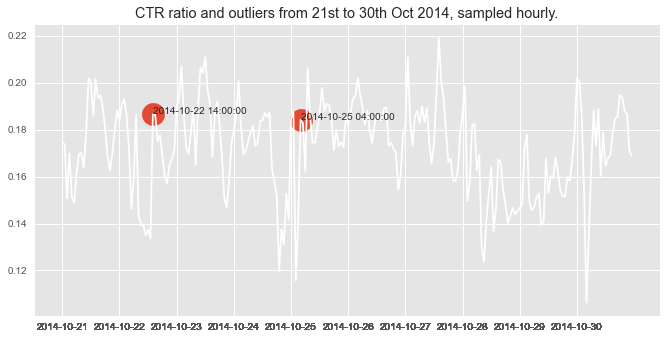

In [281]:
df_condition = df[df["outlier"]==True]

plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(df.index, df["ctr"], "w")
plt.scatter(df_condition.index, df_condition["ctr"], s=500)

outlier_timestamps = ["2014-10-22 14:00:00", "2014-10-25 04:00:00"]

for timestamp in range(len(df_condition)):
   plt.annotate(outlier_timestamps[timestamp], (df_condition.index[timestamp], df_condition["ctr"][timestamp]))

plt.title("CTR ratio and outliers from 21st to 30th Oct 2014, sampled hourly.")

plt.xticks(df.index.normalize())
plt.savefig(f"../{PLOTS_DIR}/ctr_ratio_ma_3hrs.png")
plt.show()